# Comparison of algorithms

In [13]:
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [24]:
df_vt = pd.read_csv('pacing(vt)_09-07-2020_07-08-2020.csv', index_col="Date", parse_dates=True)
df_vt.head()

,ID,timestamp,nb_imp,price,win,seconds_notif,target,bt,vt,buying,remaining_budget,engaged_budget,spent_budget
Date,,,,,,,,,,,,,
2020-07-09 06:00:00,1,1.594267e+09,2,2,True,381,0.059524,0.060976,0.001452,True,3000,2,0
2020-07-09 06:00:01,2,1.594267e+09,1,1,True,800,0.059524,0.065360,0.004384,True,2998,3,0
2020-07-09 06:00:02,3,1.594267e+09,0,0,True,578,0.059524,0.072767,0.007407,True,2997,3,0
2020-07-09 06:00:04,4,1.594267e+09,0,0,True,583,0.059524,0.081089,0.008322,True,2997,3,0
2020-07-09 06:00:06,5,1.594267e+09,0,0,True,625,0.059524,0.087198,0.006109,True,2997,3,0


In [25]:
df_at = pd.read_csv('pacing(at)_09-07-2020_07-08-2020.csv', index_col="Date", parse_dates=True)
df_at.head()

,ID,timestamp,nb_imp,price,win,seconds_notif,target,bt,at,buying,remaining_budget,engaged_budget,spent_budget
Date,,,,,,,,,,,,,
2020-07-09 06:00:00,1,1.594267e+09,2,2,True,381,0.059524,0.060976,0.001452,True,3000,2,0
2020-07-09 06:00:01,2,1.594267e+09,1,1,True,800,0.059524,0.065360,0.002932,True,2998,3,0
2020-07-09 06:00:02,3,1.594267e+09,0,0,True,578,0.059524,0.069819,0.000076,True,2997,3,0
2020-07-09 06:00:04,4,1.594267e+09,0,0,True,583,0.059524,0.067711,-0.006567,True,2997,3,0
2020-07-09 06:00:06,5,1.594267e+09,0,0,True,625,0.059524,0.058354,-0.007250,False,2997,3,0


In [26]:
rb_vt = df_vt.remaining_budget.groupby(df_vt.index.day).tail(1).sum()
rb_at = df_at.remaining_budget.groupby(df_at.index.day).tail(1).sum()
print(f"The remaining budget with speed is {rb_vt} euros and is {rb_at} euros for acceleration")

The remaining budget with speed is 3546 euros and is 3254 euros for acceleration


In [33]:
day_vt = df_vt['2020-07-25 06:00:00':'2020-07-25 20:00:00']
day_at = df_at['2020-07-25 06:00:00':'2020-07-25 20:00:00']

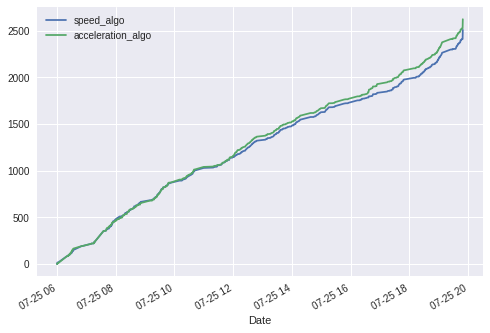

In [34]:
day_vt.spent_budget.plot(label = 'speed_algo')
day_at.spent_budget.plot(label = 'acceleration_algo')
plt.legend()

In [29]:
df_vt.remaining_budget.groupby(df_vt.index.day).tail(1)

Date
2020-07-09 19:55:17      9
2020-07-10 19:43:18    160
2020-07-11 19:59:49      1
2020-07-12 19:49:19    202
2020-07-13 19:59:52     57
2020-07-14 19:59:59    342
2020-07-15 19:59:58     61
2020-07-16 19:59:48     10
2020-07-17 19:52:37    274
2020-07-18 19:59:51    143
2020-07-19 19:43:39    354
2020-07-20 19:59:44     14
2020-07-21 19:59:50     45
2020-07-22 19:57:52      0
2020-07-23 19:59:52      0
2020-07-24 19:59:52    264
2020-07-25 19:49:06    490
2020-07-26 19:55:11      4
2020-07-27 19:59:59     59
2020-07-28 19:47:11    183
2020-07-29 19:56:10      0
2020-07-30 19:47:31    220
2020-07-31 19:59:48     87
2020-08-01 19:59:49      7
2020-08-02 19:57:23    231
2020-08-03 19:59:55     52
2020-08-04 19:59:47      0
2020-08-05 19:56:32     69
2020-08-06 19:47:39     59
2020-08-07 19:50:45    149
Name: remaining_budget, dtype: int64

In [30]:
df_at.remaining_budget.groupby(df_at.index.day).tail(1)

Date
2020-07-09 19:55:17      9
2020-07-10 19:43:18    167
2020-07-11 19:59:49      1
2020-07-12 19:49:19    201
2020-07-13 19:59:52     57
2020-07-14 19:59:59    332
2020-07-15 19:59:58     56
2020-07-16 19:59:48     10
2020-07-17 19:52:37    277
2020-07-18 19:59:51     30
2020-07-19 19:43:39    355
2020-07-20 19:59:44     12
2020-07-21 19:59:50     44
2020-07-22 19:57:52      1
2020-07-23 19:59:52      0
2020-07-24 19:59:52    252
2020-07-25 19:49:06    376
2020-07-26 19:55:11      4
2020-07-27 19:59:59     60
2020-07-28 19:47:11    182
2020-07-29 19:56:10      0
2020-07-30 19:47:31    222
2020-07-31 19:59:48     59
2020-08-01 19:59:49     10
2020-08-02 19:57:23    208
2020-08-03 19:59:55     68
2020-08-04 19:59:47      0
2020-08-05 19:56:32     67
2020-08-06 19:47:39     59
2020-08-07 19:50:45    135
Name: remaining_budget, dtype: int64